In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Training set dataframe
df_train = pd.read_csv('train.csv', encoding = 'ISO-8859-1', low_memory=False)

# Test set dataframe
df_test = pd.read_csv('test.csv', encoding = 'ISO-8859-1', low_memory=False)

# Ticket_ID to address dataframe
df_address = pd.read_csv('addresses.csv', encoding = 'ISO-8859-1', low_memory=False)

# Address to geographical coordinates dataframe
df_latlon = pd.read_csv('latlons.csv',  encoding = 'ISO-8859-1', low_memory=False)

The number of rows in the train + test dataframes match the ones in address.

In [122]:
print('Total number of rows in train + test data: ' + str(df_train.shape[0] + df_test.shape[0]))
print('Total number of addresses: ' + str(df_address.shape[0]))
print('Total number of geolocations: ' + str(df_latlon.shape[0]))

Total number of rows in train + test data: 311307
Total number of addresses: 311307
Total number of geolocations: 121769


In [123]:
df_train.describe()

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,250306.000000,2.503060e+05,0.0,2.467040e+05,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.0,250306.000000,250306.000000,250306.000000,159880.000000
mean,152665.543099,1.064986e+04,NaN,9.149788e+03,374.423435,12.774764,6.387382,21.494506,0.125167,0.0,268.685356,48.898986,222.449058,0.072536
std,77189.882881,3.188733e+04,NaN,3.602034e+04,707.195807,9.607344,4.803672,56.464263,3.430178,0.0,626.915212,222.422425,606.394010,0.259374
min,18645.000000,0.000000e+00,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000
25%,86549.250000,4.739000e+03,NaN,5.440000e+02,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,152597.500000,1.024400e+04,NaN,2.456000e+03,250.000000,20.000000,10.000000,10.000000,0.000000,0.0,140.000000,0.000000,25.000000,0.000000
75%,219888.750000,1.576000e+04,NaN,1.292725e+04,250.000000,20.000000,10.000000,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000
max,366178.000000,1.415411e+07,NaN,5.111345e+06,10000.000000,20.000000,10.000000,1000.000000,350.000000,0.0,11030.000000,11075.000000,11030.000000,1.000000


In [124]:
df_train = df_train.merge(df_address, on='ticket_id', how='inner') # merge the address dataframe to training set
                                                                   # on the ticket_id column using an inner merge

df_test = df_test.merge(df_address, on='ticket_id', how='inner')

In [125]:
df_train = df_train.merge(df_latlon, on='address', how='inner') # merge the geolocation dataframe to training set
                                                                # on the address column using an inner merge

df_test = df_test.merge(df_latlon, on='address', how='inner')

We see that the geolocation dataframe contains missing data on lattitude and longitude for seven addresses. If we want to use all the instances in our ML algorithm, these have to be filled in. Ideally one should find the exact coordinates. However the simplest thing to do is to use the general coordinates for Detroit, MI which is lattitude = 42.331429 and longitude = -83.045753.

In [126]:
df_latlon[df_latlon['lat'].isnull()]

,address,lat,lon
4126,"12038 prairie, Detroit MI 482O4",NaN,NaN
10466,"20424 bramford, Detroit MI",NaN,NaN
17293,"6200 16th st, Detroit MI 482O8",NaN,NaN
34006,"8325 joy rd, Detroit MI 482O4",NaN,NaN
55750,"1201 elijah mccoy dr, Detroit MI 48208",NaN,NaN
74721,"8300 fordyce, Detroit MI",NaN,NaN
100359,"445 fordyce, Detroit MI",NaN,NaN


In [127]:
df_train['lat'].fillna(42.331429, inplace=True)
df_test['lat'].fillna(42.331429, inplace=True)
df_train['lon'].fillna(-83.045753, inplace=True)
df_test['lon'].fillna(-83.045753, inplace=True)

The data needs to be cleaned up a bit. Since NaN values in compliance indicate violator was found not responsible, the rows can be dropped using dropna(). Also, the violation_street_number and mailing_address_str_number are in decimals, which is odd for street numbers. These are converted to integers.

In [128]:
df_train.set_index('ticket_id', inplace=True)
df_test.set_index('ticket_id', inplace=True)

df_train.dropna(subset=['compliance'], inplace=True)

In [129]:
# Somewhat cleaned up and merged. Since the geolocation data have been included, the dataset
# does not retain its original order.

df_train.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
77242,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INV. INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WACKER,CHICAGO,IL,...,580.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
77243,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MORTGAGE CO., MIDWEST",2900.0,TYLER,NaN,3.0,S. WACKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
138219,Department of Public Works,"Talbert, Reginald","INVESTMENT INC, MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S WACKER #1418,CHICAGO,IL,...,140.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
177558,"Buildings, Safety Engineering & Env Department","Morris, John","INVESTMENT, MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WACKER,CHICAGO,IL,...,360.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268


In [130]:
non_comp = df_train['compliance'].value_counts()[0]
comp = df_train['compliance'].value_counts()[1]

comp_ratio = comp / (comp + non_comp) 

print('Number of compliances is ' + str(comp))
print('The compliance ratio in the dataset is ' + str(comp_ratio))

Number of compliances is 11597
The compliance ratio in the dataset is 0.07253565173880411


The ratio of compliance in the dataset is a meagre 7.2%, which indicates a great imbalance between the two classes.

In [131]:
df_train.columns

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')

Not all attributes are useful in creating a predictive model. So we keep a certain subset of them that will be helpful. We also get rid of certain features to reduce data leakage. We can check which columns contain mostly NaN values (shown in white) using the heatmap below.

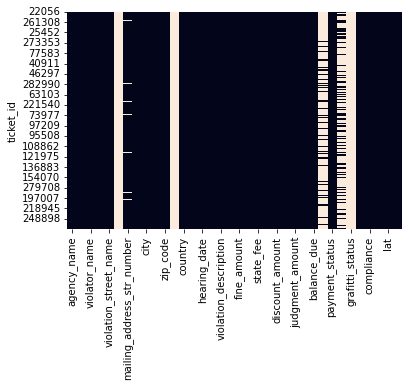

In [132]:
import seaborn as sns

sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [133]:
# Using only the following columns in the training data

cols_to_use = ['agency_name', 'violation_code', 'disposition', 'fine_amount', 'judgment_amount',
               'late_fee', 'admin_fee', 'discount_amount', 'compliance', 'lat', 'lon']

df_train = df_train[cols_to_use]

In [134]:
df_train.head()

,agency_name,violation_code,disposition,fine_amount,judgment_amount,late_fee,admin_fee,discount_amount,compliance,lat,lon
ticket_id,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,250.0,305.0,25.0,20.0,0.0,0.0,42.390729,-83.124268
77242,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,500.0,580.0,50.0,20.0,0.0,0.0,42.390729,-83.124268
77243,"Buildings, Safety Engineering & Env Department",9-1-81(a),Responsible by Default,250.0,305.0,25.0,20.0,0.0,0.0,42.390729,-83.124268
138219,Department of Public Works,9-1-105,Responsible by Default,100.0,140.0,10.0,20.0,0.0,0.0,42.390729,-83.124268
177558,"Buildings, Safety Engineering & Env Department",19450901,Responsible by Default,300.0,360.0,30.0,20.0,0.0,0.0,42.390729,-83.124268


In [135]:
df_train['disposition'].unique()

array(['Responsible by Default', 'Responsible by Determination',
       'Responsible by Admission', 'Responsible (Fine Waived) by Deter'],
      dtype=object)

Let's group certain attributes and check for frequency of compliance. The 'Buildings, Safety Engineering & Env Department' and 'Department of Public Works' were the agencies that issued the majority of blight violation tickets.

In [136]:
df_train.groupby('agency_name')['compliance'].value_counts()

agency_name                                     compliance
Buildings, Safety Engineering & Env Department  0.0           90040
                                                1.0            5823
Department of Public Works                      0.0           47727
                                                1.0            4718
Detroit Police Department                       0.0            3876
                                                1.0             588
Health Department                               0.0            6639
                                                1.0             468
Neighborhood City Halls                         0.0               1
Name: compliance, dtype: int64

In [137]:
df_train.groupby('disposition')['compliance'].value_counts()

disposition                         compliance
Responsible (Fine Waived) by Deter  1.0              195
Responsible by Admission            0.0             9933
                                    1.0             3768
Responsible by Default              0.0           133055
                                    1.0             5285
Responsible by Determination        0.0             5295
                                    1.0             2349
Name: compliance, dtype: int64

Let's perform some exploratory data analysis. We first check how much fine violators are likely to incur. As a reference, the largest fine in the training dataset is $10,000.

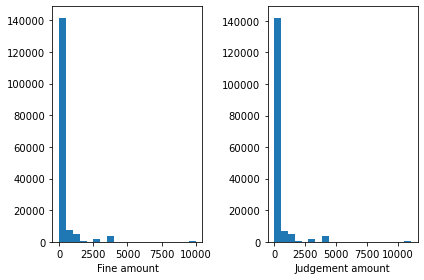

In [138]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df_train['fine_amount'], bins=20)
ax1.set_xlabel('Fine amount')

ax2.hist(df_train['judgment_amount'], bins=20)
ax2.set_xlabel('Judgement amount')

fig.tight_layout()
plt.show()

If we shrink down the range of fines, we see that most fines less than $500.

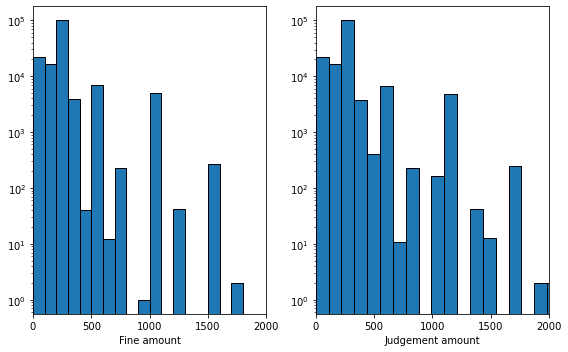

In [139]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))

ax1.hist(df_train['fine_amount'], bins=100, edgecolor='black')
ax1.set_xlabel('Fine amount')
ax1.set_xlim(0, 2000)
ax1.set_yscale('log')

ax2.hist(df_train['judgment_amount'], bins=100, edgecolor='black')
ax2.set_xlabel('Judgement amount')
ax2.set_xlim(0, 2000)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_4264/2555503758.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(agency_list, rotation=90)
C:\Users\Dell\AppData\Local\Temp/ipykernel_4264/2555503758.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(disposition_list,rotation=90)


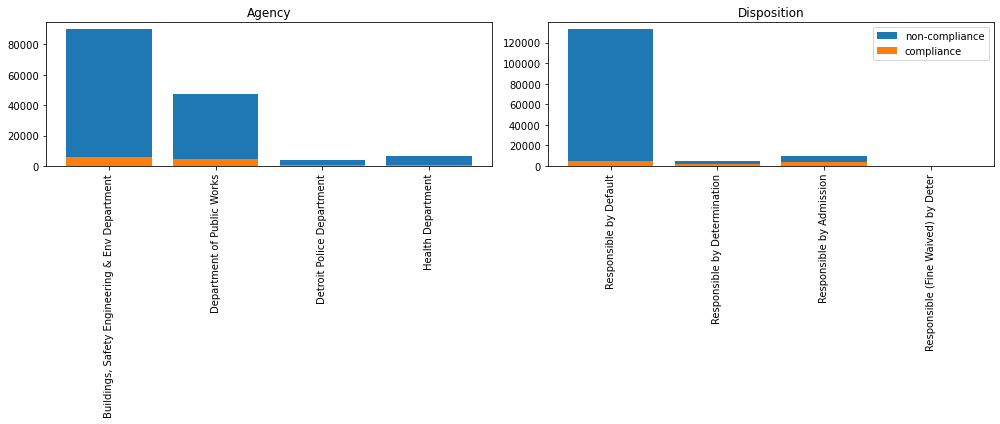

In [140]:
# We define a function that extracts the number of compliances and non-compliances given a particular 'feature' (first argument)
# I am sure there is an easier way to do this...but couldn't figure it out

def compliance_by_feature(feature, feature_list):

    compliance = []
    non_compliance = []

    for item in feature_list:

        test = df_train[df_train[feature] == item]

        if test['compliance'].all() == False:

            nc = test['compliance'].value_counts()[0]
            c = test['compliance'].value_counts()[1]

            non_compliance.append(nc)
            compliance.append(c)
        
        else:

            if test['compliance'].iloc[0] == 0:

                nc = test['compliance'].value_counts()[1]

                non_compliance.append(nc)
                compliance.append(0)

            else:

                c = test['compliance'].value_counts()[1]

                compliance.append(c)
                non_compliance.append(0)

        del test

    return compliance, non_compliance

agency_list = ['Buildings, Safety Engineering & Env Department', 'Department of Public Works',
                'Detroit Police Department', 'Health Department'] # This excludes Neighborhood City Hall since it has only one occurance

disposition_list = df_train['disposition'].unique().tolist()

comp1, non_comp1 = compliance_by_feature('agency_name', agency_list)
comp2, non_comp2 = compliance_by_feature('disposition', disposition_list)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

ax1.bar(agency_list, non_comp1, label='non-compliance')
ax1.bar(agency_list, comp1, label='compliance')
ax1.set_xticklabels(agency_list, rotation=90)
ax1.set_title('Agency')

ax2.bar(disposition_list, non_comp2, label='non-compliance')
ax2.bar(disposition_list, comp2, label='compliance')
ax2.set_xticklabels(disposition_list,rotation=90)
ax2.set_title('Disposition')

plt.legend()
fig.tight_layout()
plt.show()



We make a scatter plot of the geolocation of the tickets and color code them using compliance. We see that the compliant instances are mostly clustered in a small region while the non-compliant instances are more varied geographically (even with a few outliers).

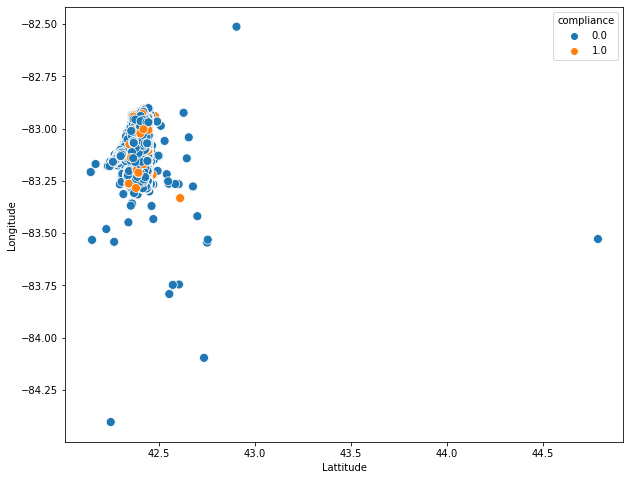

In [141]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='lat', y='lon', data=df_train, hue='compliance', s=80)
plt.xlabel('Lattitude')
plt.ylabel('Longitude')
plt.show()

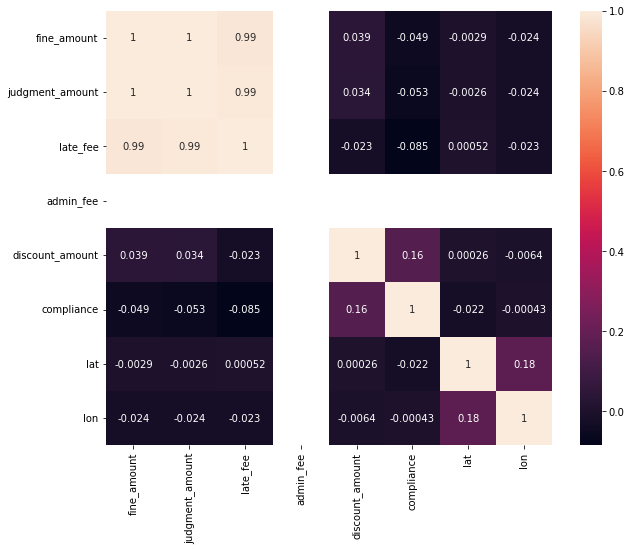

In [142]:
corr_matrix = df_train.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

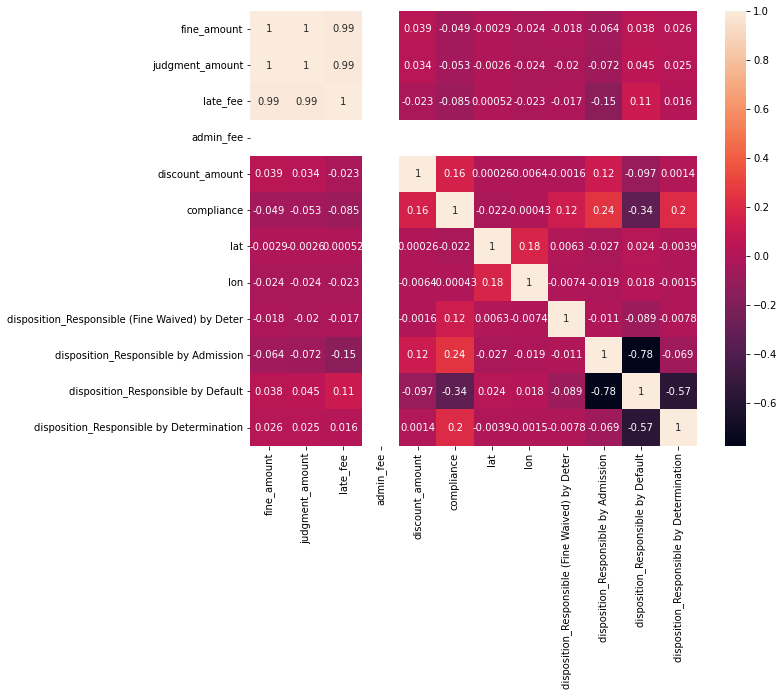

In [143]:
# We include the correlation between the compliance and the different classes 
# of disposition. The disposition classes are converted to numbers using get_dummies()

df_dummy = pd.get_dummies(df_train, columns=['disposition'])

corr_matrix2 = df_dummy.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix2, annot=True)
plt.show()

We already have a training dataframe, so we do not have to do a split. What we have to do is take the training data and remove the 'compliance' column to create X_train and the 'compliance' column will serve as y_train. We first try to simplify the task by only considering the various fees and fines (numerical data) in the attributes. That means in addition to previously dropped columns, we now drop 'agency_name', 'violation_code' and 'disposition'. These may have an effect on the eventual result, but for now we are ignoring them.

In [144]:
# Some preprocessing

df = df_train.drop(['agency_name', 'violation_code', 'disposition', 'compliance'], axis='columns')
df_comp = df_train['compliance']

cols_to_use_test = ['fine_amount', 'judgment_amount', 'late_fee', 'admin_fee', 'discount_amount', 'lat', 'lon']
df_test = df_test[cols_to_use_test]

Let's use the Random Forest and Gradient Boosting Classifiers.

0.7797014940605893


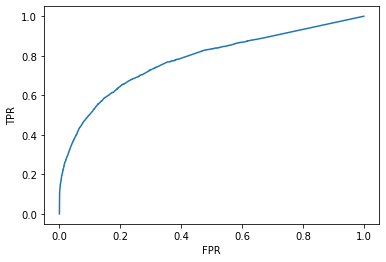

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

df_scaled = MinMaxScaler().fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_comp, random_state=10)

clf_RF = RandomForestClassifier(max_depth=50, max_features='sqrt', n_jobs=4).fit(X_train, y_train)
RF_probs = clf_RF.predict_proba(X_test)

auc_RF = roc_auc_score(y_test, RF_probs[:,1])
print(auc_RF)

RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs[:,1])

plt.plot(RF_fpr, RF_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [152]:
# Performing hyper-parameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000], 'max_depth': [10, 25, 50], 'max_features': ['sqrt', 'log2']}
RF_gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=3, n_jobs=-1, return_train_score=False)
RF_gridsearch.fit(df_train.drop(['agency_name', 'violation_code', 'disposition', 'compliance'], axis='columns'), df_train['compliance'])

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 25, 50],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]})

In [159]:
RF_gridsearch_df = pd.DataFrame(RF_gridsearch.cv_results_)

RF_gridsearch_df[RF_gridsearch_df['rank_test_score'] == 1].loc[:,'params'].tolist()

[{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500},
 {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 1000}]

0.7791620730502297


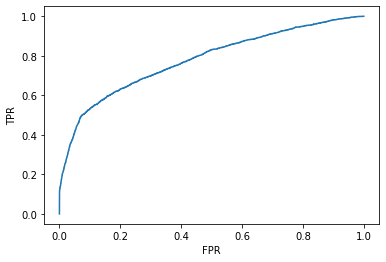

In [161]:
clf_RF = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features='log2', n_jobs=4).fit(X_train, y_train)
RF_probs = clf_RF.predict_proba(X_test)

auc_RF = roc_auc_score(y_test, RF_probs[:,1])
print(auc_RF)

RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs[:,1])

plt.plot(RF_fpr, RF_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Applying the RandomForestClassifer() on the unlabelled test data.

In [163]:
RF_probs_unlabelled = clf_RF.predict_proba(df_test)

RF_probs_unlabelled

array([[0.8804278 , 0.1195722 ],
       [0.8804278 , 0.1195722 ],
       [0.8804278 , 0.1195722 ],
       ...,
       [0.8804278 , 0.1195722 ],
       [0.8804278 , 0.1195722 ],
       [0.67734072, 0.32265928]])

In [147]:
'''
clf_GB = GradientBoostingClassifier().fit(X_train, y_train)
GB_probs = clf_GB.predict_proba(X_test)

auc_GB = roc_auc_score(y_test, GB_probs[:,1])
print(auc_GB)
'''

'\nclf_GB = GradientBoostingClassifier().fit(X_train, y_train)\nGB_probs = clf_GB.predict_proba(X_test)\n\nauc_GB = roc_auc_score(y_test, GB_probs[:,1])\nprint(auc_GB)\n'

In [176]:
pd.Series(RF_probs_unlabelled[:,1], index=df_test.index)

ticket_id
284932    0.119572
285362    0.119572
285361    0.119572
285338    0.119572
285346    0.119572
            ...   
376496    0.119572
376497    0.119572
376499    0.119572
376500    0.119572
369851    0.322659
Length: 61001, dtype: float64